In [1]:
%numerics
import sumrules.lib.legacy_analytics as alyt
import sumrules.lib.evaluators as evs
from sumrules.utils import parallel
import sumrules

matplotlib.pyplot loaded as plt
numpy loaded as np
scipy loaded as sp
scipy integrate loaded
scipy special loaded
scipy stats loaded


In [2]:
sumrules.constants["eps"] = 0.001

In [3]:
mp = evs.McolPEvaluator(None, alyt.psiColP)

mp.vectorized = True
mp.mapper = parallel.npMap
mp.absErr = 1e-8

In [4]:
mpw = evs.McolPEvaluator(None, lambda k,p,Tkp: (2*sp.pi)**3*sumrules.constants["eps"]/(sp.pi)**2/(sumrules.constants["eps"]**2 + p**2 + k**2 - 2*p*k*sp.cos(Tkp))**2)
mpw.vectorized = True
mpw.mapper = parallel.npMap
mpw.absErr = 1e-8

## MP0

In [12]:
mp.MP = alyt.sqedMP0
mpw.MP = alyt.sqedMP0

In [13]:
def make(ax, m, g, p):
    ((axCoul, axDiffAbs),(axAbsDiff, axPw))  = ax
    
    mp.CONST["m"] = m
    mp.CONST["g"] = g
    
    points = sp.exp(sp.linspace(sp.log(1e-2), sp.log(1e3), 100))

    res = sp.empty_like(points, dtype=sp.complex128)
    resPw = sp.empty_like(points, dtype=sp.complex128)
    for i in range(len(points)):
        mp.params({"maxP": points[i]})
        mpw.params({"maxP": points[i]})
        res[i] = mp.compute(p, sp.sqrt(p**2 + mp.CONST["m"]**2), 0.2, 0)
        resPw[i] = mpw.compute(p, sp.sqrt(p**2 + mp.CONST["m"]**2), 0.2, 0)
    
    axCoul.plot(points, sp.absolute(res), ".", label="m={0}, g={1}, p={2}".format(mp.CONST["m"], mp.CONST["g"], p))
    axDiffAbs.plot(points, sp.absolute(res)-sp.absolute(resPw), ".", label="m={0}, g={1}, p={2}".format(mp.CONST["m"], mp.CONST["g"], p))
    axAbsDiff.plot(points, sp.absolute(res-resPw), ".", label="m={0}, g={1}, p={2}".format(mp.CONST["m"], mp.CONST["g"], p))
    axPw.plot(points, sp.absolute(resPw), ".", label="m={0}, g={1}, p={2}".format(mp.CONST["m"], mp.CONST["g"], p))

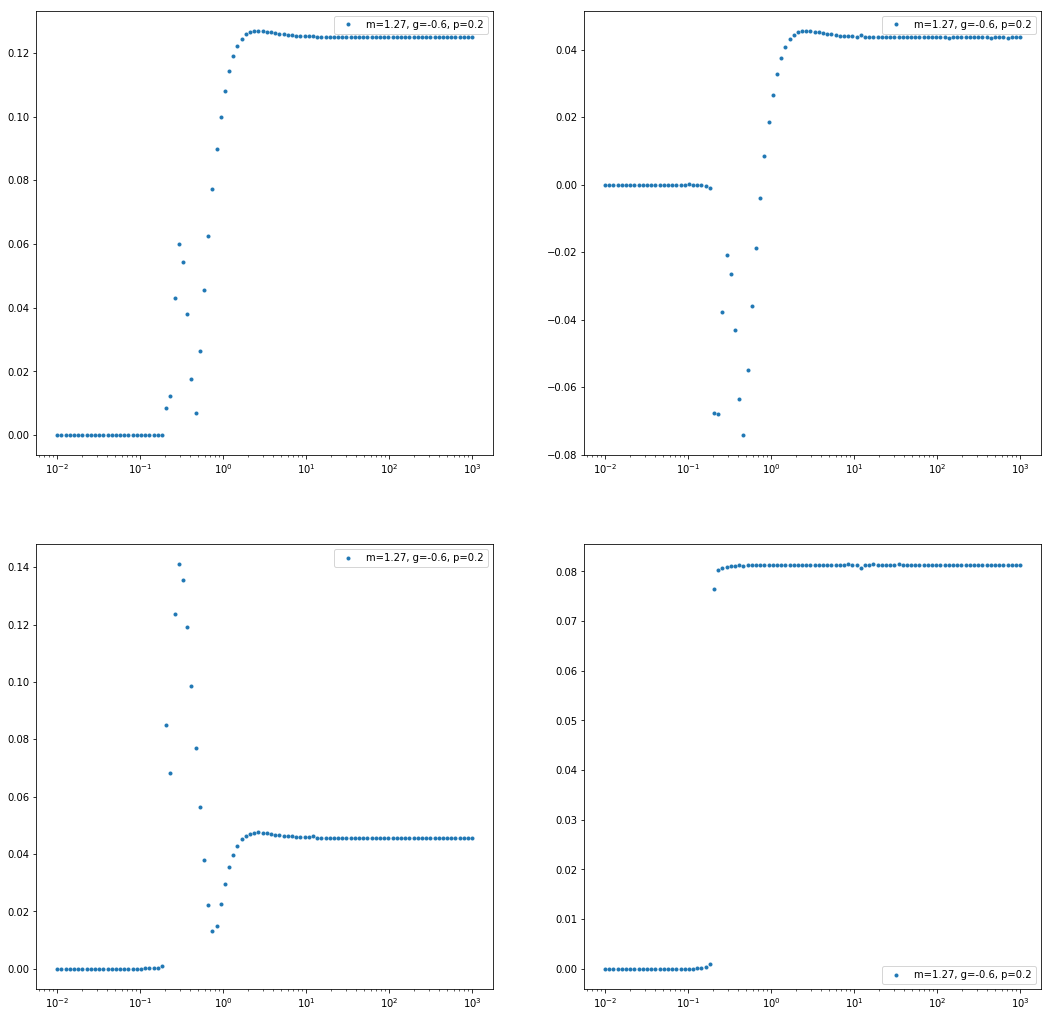

In [14]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18, 18)

make(axes, 1.27, -0.6, 0.2)

for row in axes:
    for a in row:
        a.set_xscale("log")
        a.legend()

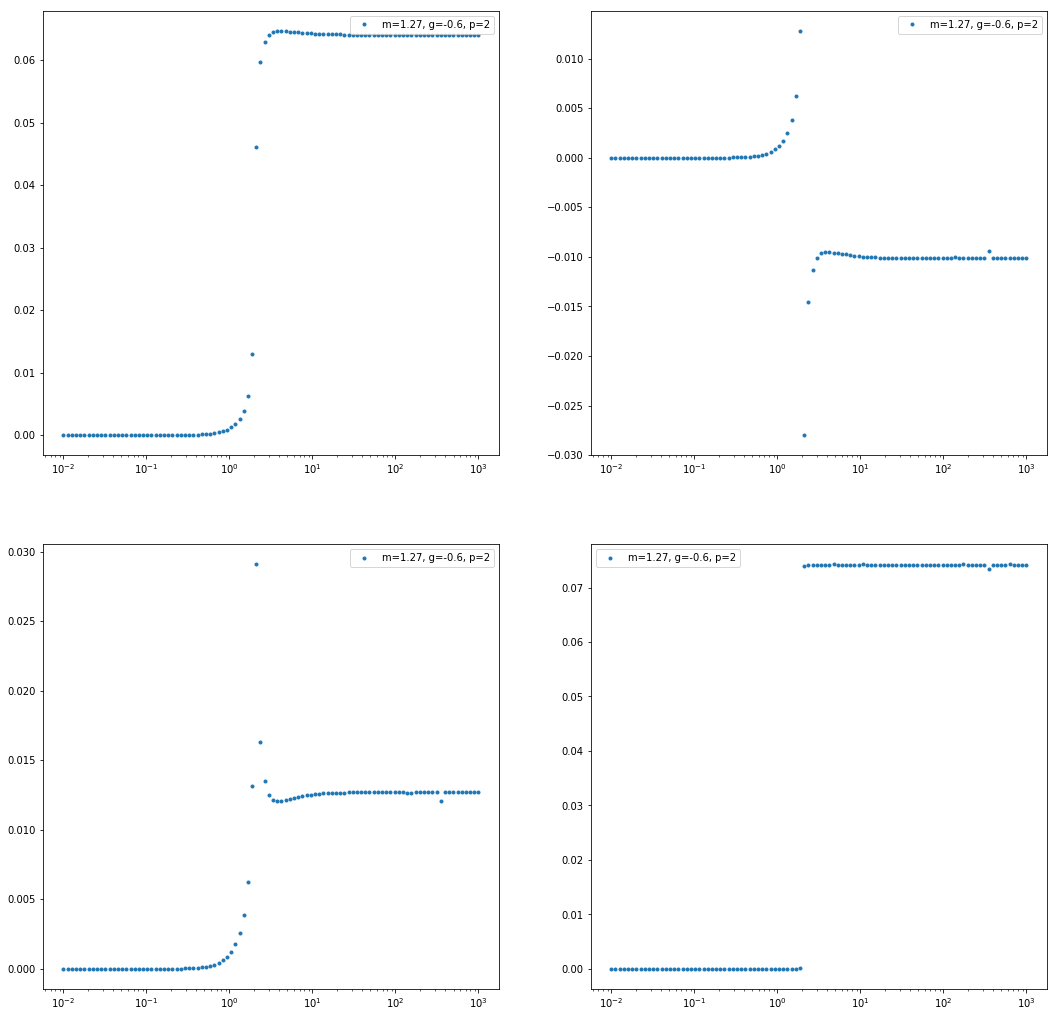

In [15]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18, 18)

make(axes, 1.27, -0.6, 2)

for row in axes:
    for a in row:
        a.set_xscale("log")
        a.legend()

## MP2

In [5]:
mp.MP = alyt.sqedMP2
mpw.MP = alyt.sqedMP2

In [6]:
def make(ax, m, g, p):
    ((axCoul, axDiffAbs),(axAbsDiff, axPw)) = ax
    
    mp.CONST["m"] = m
    mp.CONST["g"] = g
    
    points = sp.exp(sp.linspace(sp.log(1e-2), sp.log(1e3), 100))

    res = sp.empty_like(points, dtype=sp.complex128)
    resPw = sp.empty_like(points, dtype=sp.complex128)
    for i in range(len(points)):
        mp.params({"maxP": points[i]})
        mpw.params({"maxP": points[i]})
        res[i] = mp.compute(p, sp.sqrt(p**2 + mp.CONST["m"]**2), 0.2, 0)
        resPw[i] = mpw.compute(p, sp.sqrt(p**2 + mp.CONST["m"]**2), 0.2, 0)
    
    axCoul.plot(points, sp.absolute(res), ".", label="m={0}, g={1}, p={2}".format(mp.CONST["m"], mp.CONST["g"], p))
    axDiffAbs.plot(points, sp.absolute(res)-sp.absolute(resPw), ".", label="m={0}, g={1}, p={2}".format(mp.CONST["m"], mp.CONST["g"], p))
    axAbsDiff.plot(points, sp.absolute(res-resPw), ".", label="m={0}, g={1}, p={2}".format(mp.CONST["m"], mp.CONST["g"], p))
    axPw.plot(points, sp.absolute(resPw), ".", label="m={0}, g={1}, p={2}".format(mp.CONST["m"], mp.CONST["g"], p))

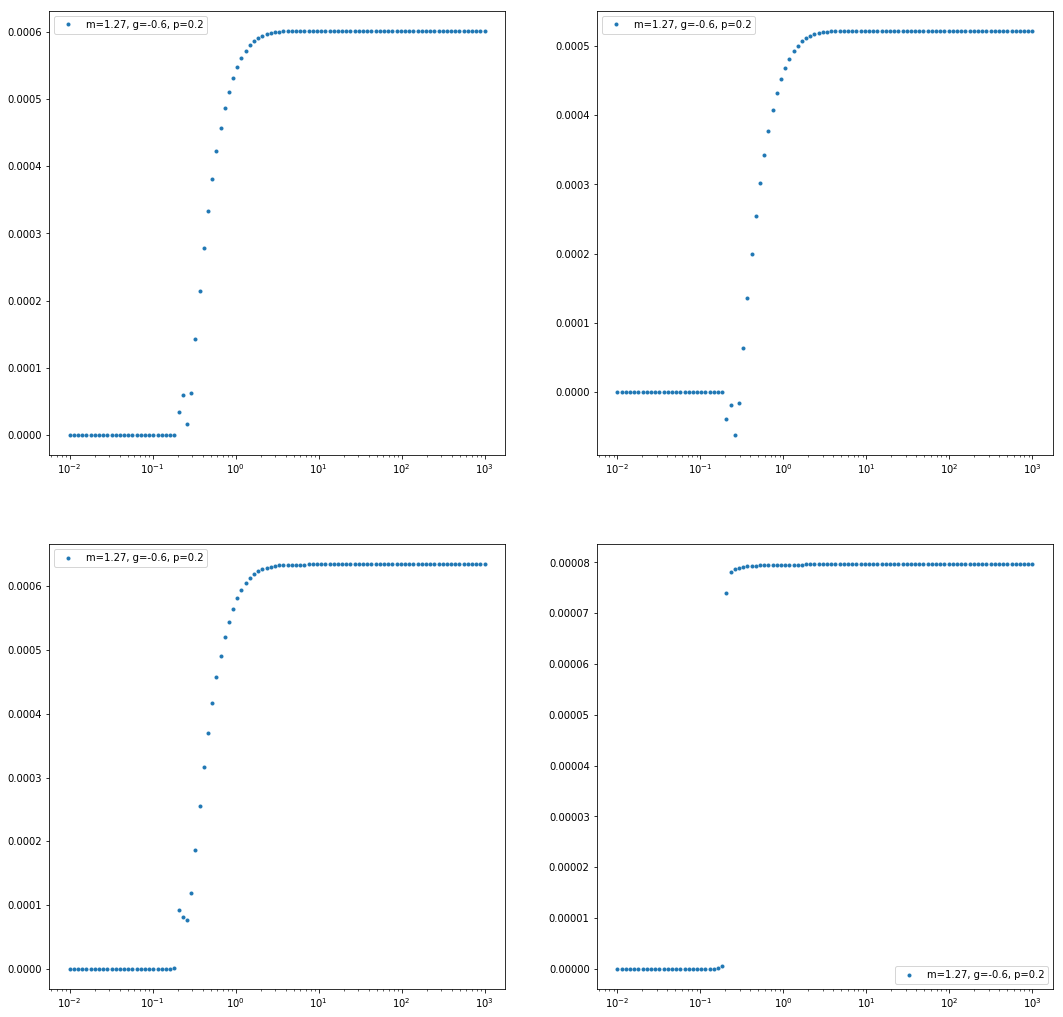

In [7]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18, 18)

make(axes, 1.27, -0.6, 0.2)

for row in axes:
    for a in row:
        a.set_xscale("log")
        a.legend()

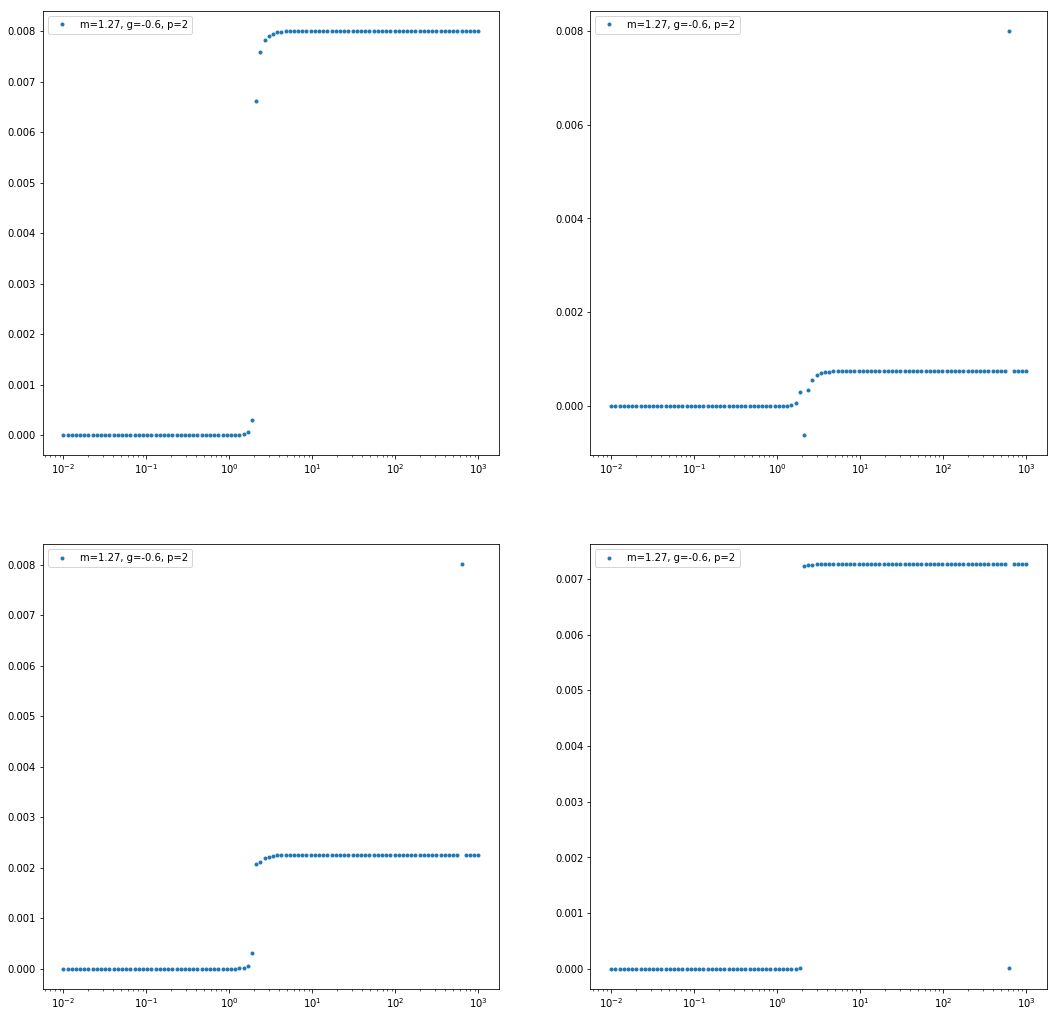

In [8]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18, 18)

make(axes, 1.27, -0.6, 2)

for row in axes:
    for a in row:
        a.set_xscale("log")
        a.legend()